In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np


In [2]:
# data preprocessing
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#normalize
x_train = x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

# reshape cnn input (batch,height,width,channels)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

#ONE-hot
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [3]:
# B- Model define and train
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')  # 10 classes of Mnist
    
])

#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train_cat,epochs=5,batch_size=64,validation_split=0.1)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8322 - loss: 0.5420 - val_accuracy: 0.9835 - val_loss: 0.0563
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 41ms/step - accuracy: 0.9698 - loss: 0.1014 - val_accuracy: 0.9880 - val_loss: 0.0427
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.9792 - loss: 0.0688 - val_accuracy: 0.9870 - val_loss: 0.0402
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.9850 - loss: 0.0502 - val_accuracy: 0.9907 - val_loss: 0.0333
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 56s 66ms/step - accuracy: 0.9864 - loss: 0.0448 - val_accuracy: 0.9903 - val_loss: 0.0329


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


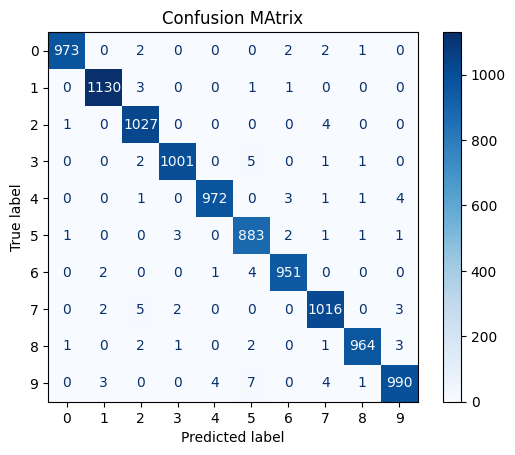

In [4]:
# Evaluation comfusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#predict
y_pred_prob=model.predict(x_test)
y_pred = np.argmax(y_pred_prob,axis=1)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion MAtrix')
plt.show()

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 29ms/step - accuracy: 0.8968 - loss: 0.3508
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9811 - loss: 0.0619
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9872 - loss: 0.0395
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9909 - loss: 0.0295
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9935 - loss: 0.0214
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


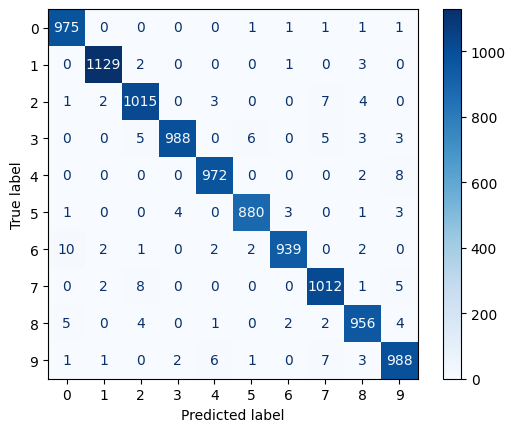

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for MNIST
])

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# Predict and show confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
